In [20]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('bbc-text.csv')

In [10]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [11]:
df.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,digital guru floats sub-$100 pc nicholas negro...
freq,511,2


note : ada beberapa text yg categorynya sama

In [31]:
df.groupby("category").count()

,text
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


data pretty well balanced

In [32]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df["text"].apply(tokenizer.tokenize)
df.head()

,category,text,tokens
0,tech,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [33]:
all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

876343 words total, with a vocabulary size of 29457
Max sentence length is 4491


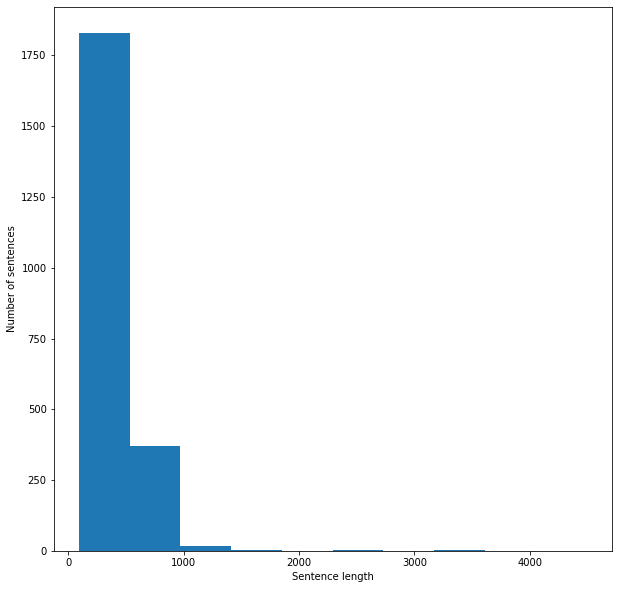

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()